In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

sns.set_theme(style="whitegrid")

# Carregamento de todos os *datasets* utilizados

In [3]:
results_df = pd.read_csv("data/formula-1/results.csv")
races_df = pd.read_csv("data/formula-1/races.csv")
drivers_df = pd.read_csv("data/formula-1/drivers.csv")
seasons_df = pd.read_csv("data/formula-1/seasons.csv")
lap_times_df = pd.read_csv("data/formula-1/lap_times.csv")
constructors_df = pd.read_csv("data/formula-1/constructors.csv")
constructor_results_df = pd.read_csv("data/formula-1/constructor_results.csv")
constructor_standings_df = pd.read_csv("data/formula-1/constructor_standings.csv")
pit_stops_df = pd.read_csv("data/formula-1/pit_stops.csv")
rr_df = pd.merge(results_df, races_df, on="raceId")
rrd = pd.merge(rr_df, drivers_df, on="driverId")

In [4]:
# Pilotos com mais pontos ao longo do tempo
# precisarei contabilizar as vitórias e aplicar a pontuação atual para ficar justo

In [5]:
# rrd.columns

In [6]:
# rrd["position"].unique()

In [7]:
rrd["grid"] = rrd["grid"].replace("\\N", "0")
rrd["position"] = rrd["position"].replace("\\N", "0")


In [8]:
rrd["delta_pos"] = rrd["grid"].astype("int64") - rrd["position"].astype("int64")
#rrd[["name", "year", "forename", "surname", "grid", "position", "delta_pos"]]

In [9]:
rrd_2020 = rrd[rrd["year"] == 2020]
#rrd_2020[["name", "year", "forename", "surname", "grid", "position", "delta_pos"]]

In [10]:
#rrd.columns

In [11]:
#rrd.groupby(["nationality"]).count()

In [12]:
races_in_2020 = races_df[races_df["year"] == 2020]

In [13]:
data = rrd[["year", "driverId", "points"]]\
    .groupby(["year", "driverId"])\
    .sum()\
    .sort_values(["points"], ascending=False)
data = data.reset_index()
# data[(data["year"] == 2019) & (data["points"] == data["points"].max())]
# data_by_year = data[data["year"] == 2015]
# data_by_year
# years_champion = data_by_year[data_by_year["points"] == data_by_year["points"].max()]
# years_champion
# data_by_year[data_by_year["points"] == data_by_year["points"].max()]

In [14]:
#list(range(2010, 2021))

In [15]:
champions = []
second_places = []
third_places = []
for year in range(1950, 2021):
    data_by_year = data[data["year"] == year]
    
    first_three = data_by_year.iloc[0:3]
    
    years_champion = data_by_year[data_by_year["points"] == data_by_year["points"].max()]
    years_champion_2 = first_three

    # champions_array.append(years_champion)
    champions.append(first_three.iloc[0])
    second_places.append(first_three.iloc[1])
    third_places.append(first_three.iloc[2])
    
temp_champions_df = pd.DataFrame(champions, columns = ["year", "driverId", "points"])
temp_second_places_df = pd.DataFrame(second_places, columns = ["year", "driverId", "points"])
temp_third_places_df = pd.DataFrame(third_places, columns = ["year", "driverId", "points"])

champions_df = pd.merge(temp_champions_df, drivers_df, on="driverId")
second_places_df = pd.merge(temp_second_places_df, drivers_df, on="driverId")
third_places_df = pd.merge(temp_third_places_df, drivers_df, on="driverId")

champions_df[["year", "driverId"]] = champions_df[["year", "driverId"]].astype(int)
second_places_df[["year", "driverId"]] = second_places_df[["year", "driverId"]].astype(int)
third_places_df[["year", "driverId"]] = third_places_df[["year", "driverId"]].astype(int)

In [16]:
champions_by_nationality = champions_df.groupby(["nationality"]).count()
# champions_by_nationality
second_places_by_nationality = second_places_df.groupby(["nationality"]).count()
third_places_by_nationality = third_places_df.groupby(["nationality"]).count()

In [17]:
gold = "#D4AF37"
silver = "#C0C0C0"
bronze = "#aa733d"

# O domínio do Reino Unido ao longo dos anos
Nota-se claramente o domínio britânico na competição. O que não é surpreendente dada a origem da Fórmula 1

PS: Há um erro nestes dados pois em 1988 as regras foram alteradas e o título não foi para o piloto que fez mais pontos no geral, mas sim para o piloto que fez mais pontos nas corridas elegíveis. Dessa forma em 1988 o campeão foi Ayrton Senna (Brasil) e não Allain Prost (França)

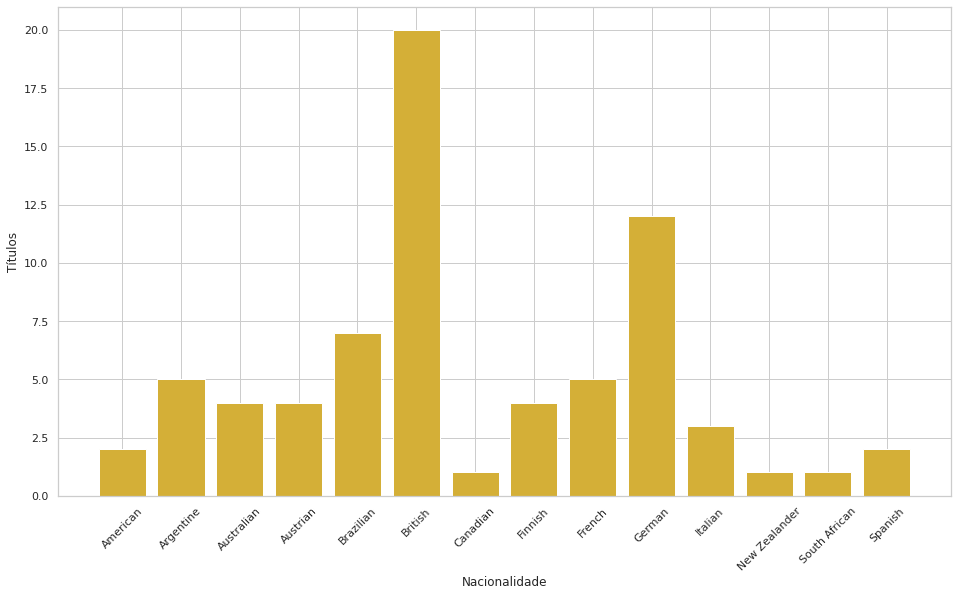

In [18]:
labels = champions_by_nationality.index
height = champions_by_nationality["year"]

plt.figure(figsize=(16, 9))
plt.bar(labels, height, color = gold)
plt.ylabel("Títulos")
plt.xlabel("Nacionalidade")
plt.xticks(rotation=45)
plt.show()

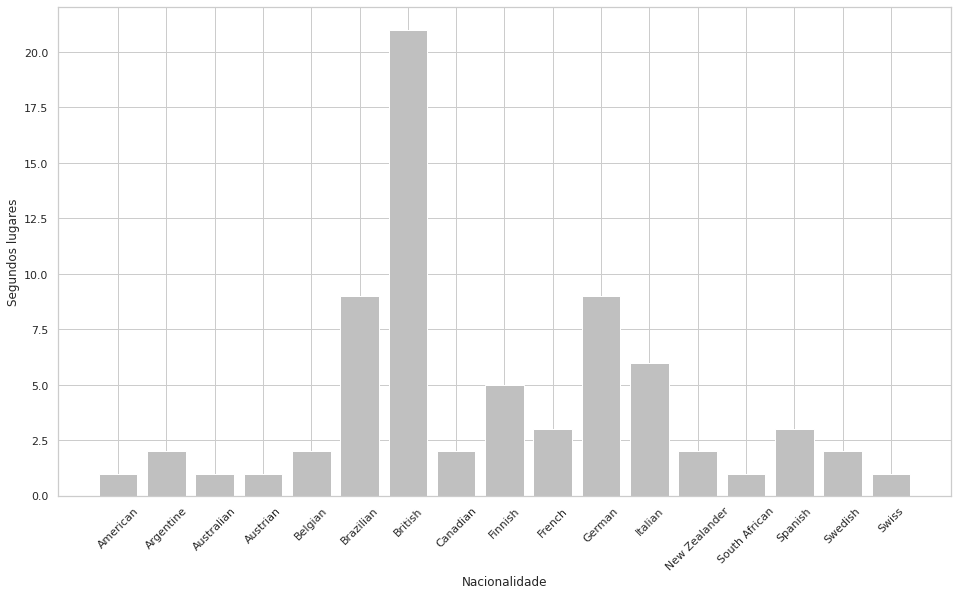

In [19]:
labels = second_places_by_nationality.index
height = second_places_by_nationality["year"]

plt.figure(figsize=(16, 9))
plt.bar(labels, height, color = silver)
plt.ylabel("Segundos lugares")
plt.xlabel("Nacionalidade")
plt.xticks(rotation=45)
plt.show()

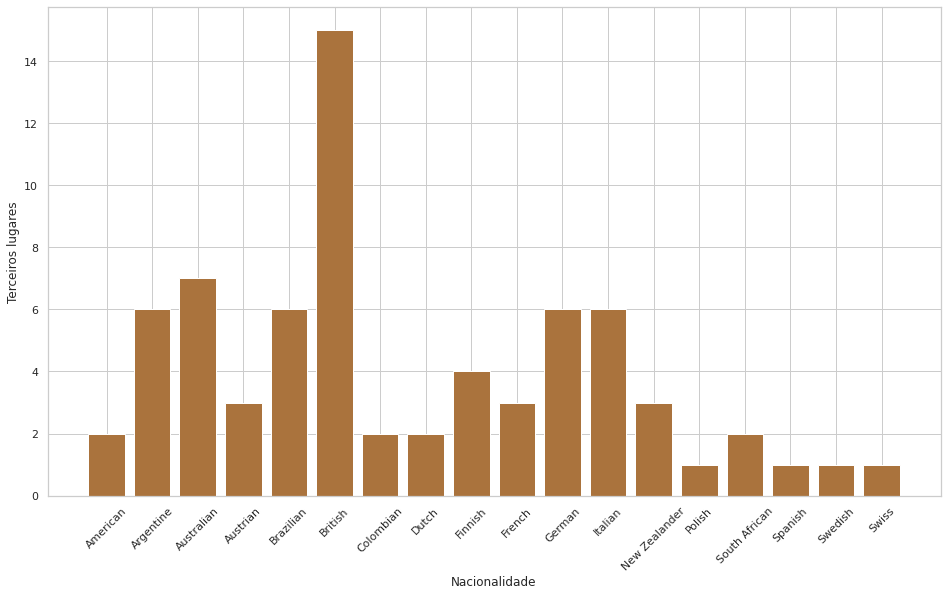

In [20]:
#b08d57
labels = third_places_by_nationality.index
height = third_places_by_nationality["year"]

plt.figure(figsize=(16, 9))
plt.bar(labels, height, color = bronze)
plt.ylabel("Terceiros lugares")
plt.xlabel("Nacionalidade")
plt.xticks(rotation=45)
plt.show()

### Obtenção dos primeiros, segundos e terceiros lugares
Processo os dados criando 4 arrays, contendo as nacionalidades, primeiros, segundos e terceiros lugares, respectivamente. 
A coluna `year` foi escolhida aleatóriamente. Como o dataframe agrupado traz todas as colunas originais, bastava uma coluna qualquer para obter o valor desejado 

In [21]:
champions_by_nationality.index.values

all_nationalities = set()

for v in champions_by_nationality.index.values:
    all_nationalities.add(v)
for v in second_places_by_nationality.index.values:
    all_nationalities.add(v)
for v in third_places_by_nationality.index.values:
    all_nationalities.add(v)    

nationalities = sorted(list(all_nationalities))
firsts = []
seconds = []
thirds = []

for n in nationalities:
    value = None
    try:
        value = champions_by_nationality.loc[n]["year"]
    except KeyError as e:
        value = 0
    firsts.append(value)
    
    value = None
    try:
        value = second_places_by_nationality.loc[n]["year"]
    except KeyError as e:
        value = 0
    seconds.append(value)
    
    value = None
    try:
        value = third_places_by_nationality.loc[n]["year"]
    except KeyError as e:
        value = 0
    thirds.append(value)    

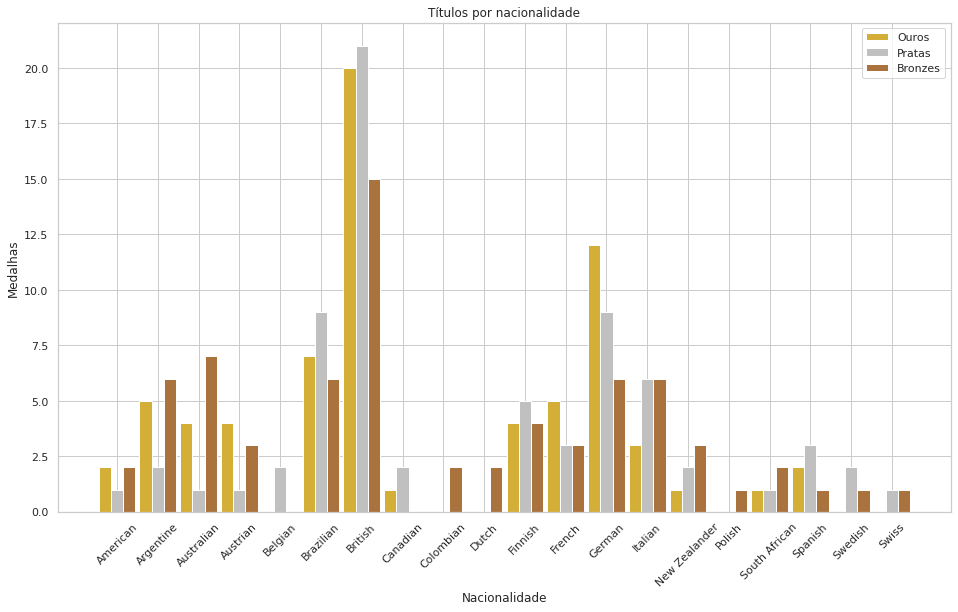

In [22]:
ind = np.arange(len(nationalities))
width = 0.3

# print(ind)
# print(ind + width)
# print(ind + width * 2)

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(111)

first_rects = ax.bar(ind, firsts, width, color = gold)
second_rects = ax.bar(ind + width, seconds, width, color = silver)
third_rects = ax.bar(ind + (width * 2), thirds, width, color = bronze)

ax.set_xticks(ind + width)
ax.set_xticklabels(tuple(nationalities))
ax.legend((first_rects, second_rects, third_rects), ("Ouros", "Pratas", "Bronzes"))

plt.ylabel("Medalhas")
plt.xlabel("Nacionalidade")
plt.title("Títulos por nacionalidade")
plt.xticks(rotation=45)
plt.show()

### Evolução dos tempos das voltas no GP do Brasil ao longo dos anos
Voltas rápidas

In [23]:
brazilian_gp_races = races_df[races_df["name"] == "Brazilian Grand Prix"]
#brazilian_gp_races

In [24]:
# rrd[rrd["raceId"] == 1008]
# lap_times_df[lap_times_df["raceId"] == 1008]

In [25]:
def to_ms(str_data):
    minutes = str_data.split(":")[0]
    seconds_and_millis = str_data.split(":")[1]
    seconds = seconds_and_millis.split(".")[0]
    millis = seconds_and_millis.split(".")[1]
    ms = (int(minutes) * 60000) + (int(seconds) * 1000) + int(millis)
    return ms

def formatted_ms(time_in_ms):
    minutes, msec = divmod(time_in_ms, 60000)
    sec, msec = divmod(msec, 1000)
    return '{minutes}:{sec}.{msec}'.format(minutes = str(int(minutes)), 
                                           sec = str(int(sec)).zfill(2), 
                                           msec = str(int(msec)).zfill(3))

print(to_ms("1:22.384"))
print(formatted_ms(to_ms("1:22.384")))

82384
1:22.384


/tmp/ipykernel_229/1903676261.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


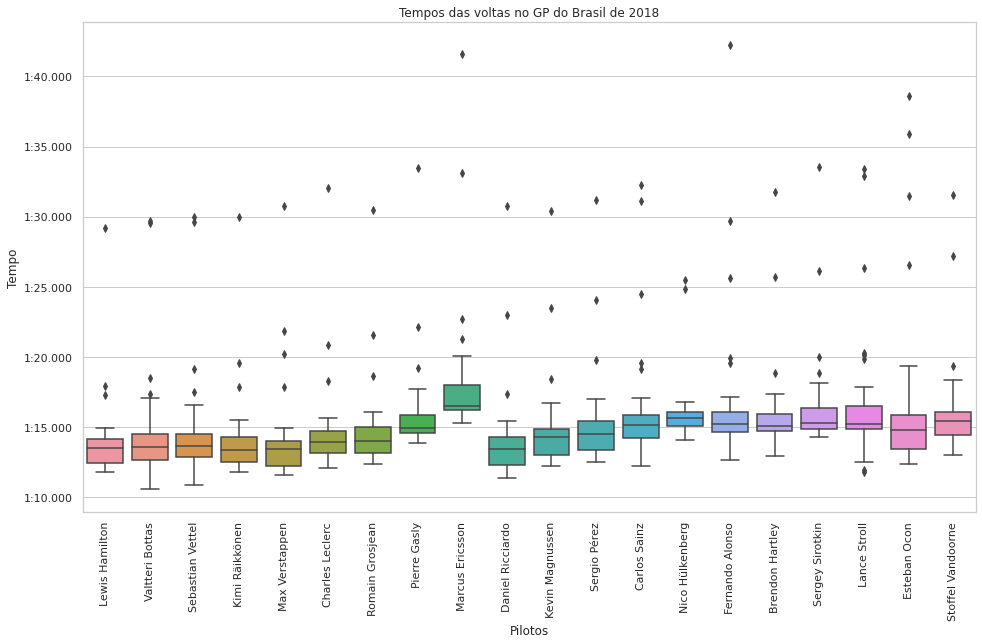

In [26]:
lap_time_data = lap_times_df[lap_times_df["raceId"] == 1008]
lap_time_data = pd.merge(lap_time_data, drivers_df, on = "driverId")

#lap_time_data = lap_time_data[lap_time_data["milliseconds"] <= 80000]

lap_time_data = lap_time_data.assign(fullname=lap_time_data.forename.map(str) + " " + lap_time_data.surname)
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90)

x = lap_time_data["fullname"]
y = lap_time_data["milliseconds"]
chart = sns.boxplot(x=x, y=y)
chart.set(title="Tempos das voltas no GP do Brasil de 2018", 
          xlabel="Pilotos", 
          ylabel="Tempo")

ax = plt.gca()
labels = [formatted_ms(int(l)) for l in ax.get_yticks().tolist()]
ax.set_yticklabels(labels)

plt.show()

/tmp/ipykernel_229/3766184925.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


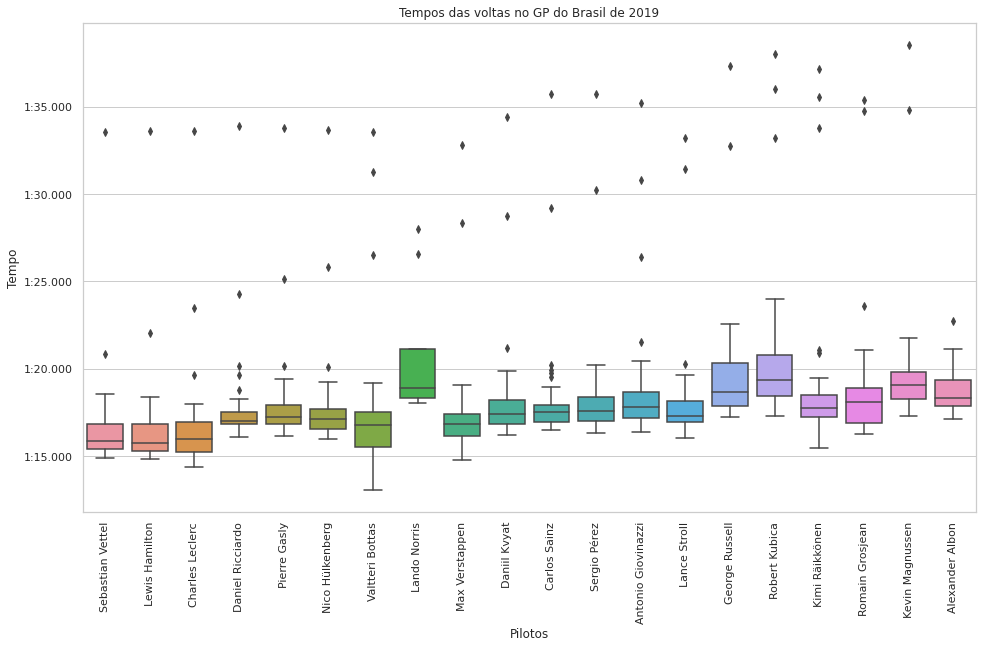

In [27]:
lap_time_data = lap_times_df[lap_times_df["raceId"] == 1016]
lap_time_data = pd.merge(lap_time_data, drivers_df, on = "driverId")

lap_time_data = lap_time_data[lap_time_data["milliseconds"] <= 100000]

lap_time_data = lap_time_data.assign(fullname=lap_time_data.forename.map(str) + " " + lap_time_data.surname)
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90)

x = lap_time_data["fullname"]
y = lap_time_data["milliseconds"]
chart = sns.boxplot(x=x, y=y)
chart.set(title="Tempos das voltas no GP do Brasil de 2019", 
          xlabel="Pilotos", 
          ylabel="Tempo")

ax = plt.gca()
labels = [formatted_ms(int(l)) for l in ax.get_yticks().tolist()]
ax.set_yticklabels(labels)

plt.show()

In [28]:
# lap_times_df

In [29]:
# columns = ["position", "driverId", "name", "forename", "surname"]
# rrd[columns]
data
data_by_year = data[data["year"] == 2020]
first_three = data_by_year.iloc[0:3].values
first_three[1][2]

223.0

In [30]:
lap_times_per_race_df = lap_times_df.merge(races_df, on = "raceId")
lap_times_in_br = lap_times_per_race_df[lap_times_per_race_df["name"] == "Brazilian Grand Prix"]

columns = ["year", "time_x", "driverId"]
print(lap_times_in_br["time_x"].values)


['1:22.384' '1:18.240' '1:18.239' ... '2:07.480' '1:17.011' '1:14.320']


#### Converto os dados das voltas para milissegundos para fazer os calculos

In [31]:
lap_times_in_br_by_year = lap_times_in_br.groupby(["year"]).mean()
#lap_times_in_br_by_year.index


In [32]:
# plt.figure(figsize=(16, 9))
# x = lap_times_in_br_by_year.index
# y = lap_times_in_br_by_year["milliseconds"] / 1000
# plt.plot(x, y)
# plt.show()

### Quantidade de corridas ao longo dos anos

In [33]:
races_per_year = races_df[["year", "raceId"]].groupby(["year"]).count()

In [34]:
races_per_year = races_per_year.reset_index()
# plt.figure(figsize=(16, 9))
# plt.bar(races_per_year["year"], races_per_year["raceId"])
# plt.show()

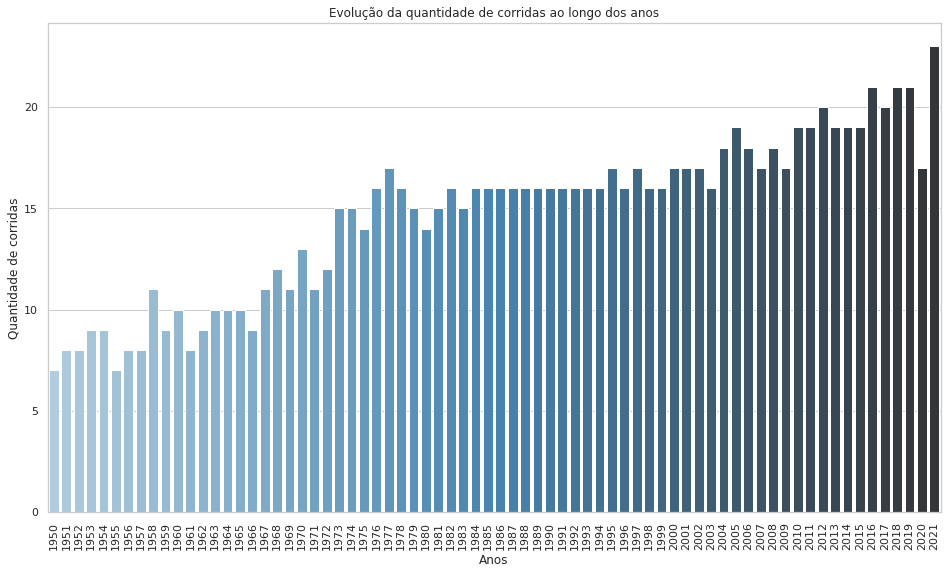

In [35]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90)
chart = sns.barplot(x = races_per_year["year"], y = races_per_year["raceId"], palette="Blues_d")
chart.set(title="Evolução da quantidade de corridas ao longo dos anos", 
          xlabel="Anos", 
          ylabel="Quantidade de corridas")
plt.show()

In [36]:
# constructors_df

In [37]:
constructors_per_year = rrd[["points", "constructorId"]].groupby([ "constructorId"]).sum().reset_index()

In [38]:
# constructors_per_year

In [39]:
# constructor_results_df.iloc[11799:]
# races_df

In [40]:
rcr_df = pd.merge(constructor_results_df, races_df, on = "raceId")
constructor_points_by_year = rcr_df[["year", "constructorId", "points"]].groupby(["year", "constructorId"]).sum().reset_index()

In [41]:
champions = []
for year in range(1950, 2021):
    data_by_year = constructor_points_by_year[constructor_points_by_year["year"] == year]
    constructor_champion = data_by_year[data_by_year["points"] == data_by_year["points"].max()]
#    print(constructor_champion.values)
    champion_data = constructor_champion[["year", "constructorId", "points"]].values
    if len(champion_data) == 0:
        champions.append([])
    else:
        champions.append(champion_data[0])

In [42]:
constructors_champions_df = pd.DataFrame(data = champions, columns = ["year", "constructorId", "points"]).dropna()
constructors_champions_df[["year", "constructorId"]] = constructors_champions_df[["year", "constructorId"]].astype("int64") 
constructors_champions_df = pd.merge(constructors_champions_df, constructors_df, on = "constructorId")
# constructors_champions_df

# Titulos de construtores ao longo dos anos

Embora não tenha títulos recentes a equipe Ferrari ainda é a maior vencedora da história da Fórmula 1 com 15 títulos.
Williams e McLaren dividem a segunda colocação com 9 títulos cada, além disso nota-se que o domínio das equipes Mercedes e Red Bull visto nos últimos anos é recente, as equipes possuem 7 e 4 títulos respectivamente!

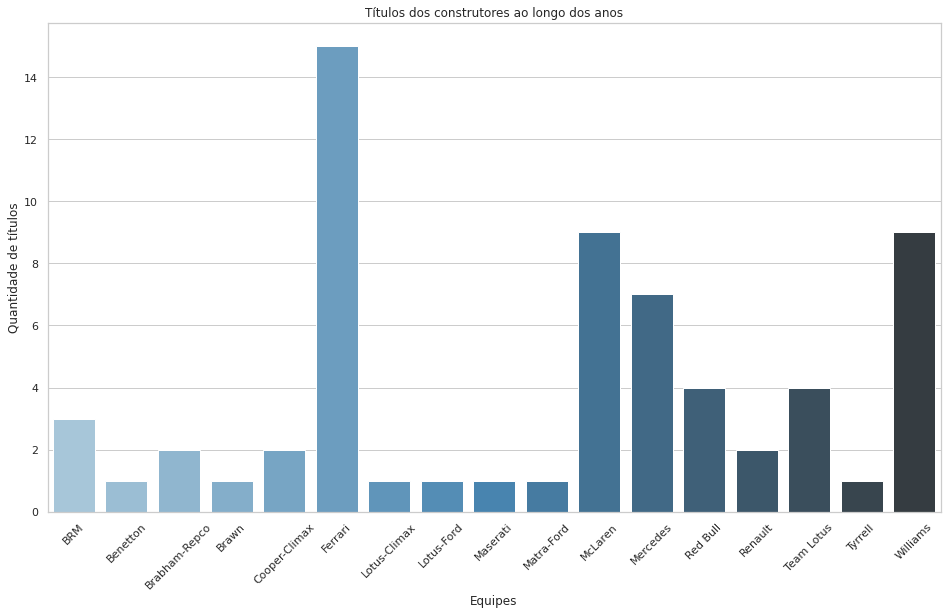

In [43]:
groups = constructors_champions_df.groupby(["name"]).count()
x = groups.index
y = groups["constructorId"]
plt.figure(figsize = (16, 9))
plt.xticks(rotation=45)
chart = sns.barplot(x = x, y = y, palette="Blues_d")
chart.set(title="Títulos dos construtores ao longo dos anos", 
          xlabel="Equipes", 
          ylabel="Quantidade de títulos")

plt.show()

# Pilotos mais longevos do esporte

In [44]:
drivers_by_season = rrd.groupby(["driverId", "year"]).count().reset_index()[["driverId", "year"]]
drivers_by_season = drivers_by_season.groupby("driverId").count().reset_index()

In [45]:
drivers_by_season_complete = pd.merge(drivers_by_season, drivers_df, on = "driverId")

Tento analisar um pouco mais a composição do dataset para entender os quartis, média, desvio padrão e mediana para tentar estipular um ponto de corte do que pode ser considerado longevo na Fórmula 1, pois 853 pilotos participaram da competição ao longo dos anos

In [46]:
#drivers_by_season_complete["year"].describe()

Selecionei os pilotos que estão no percentil 95, ou seja, dos 853 pilotos os 5% que se mantiveram em atividade por mais tempo

In [47]:
drivers_by_season_quant_95 = drivers_by_season_complete[\
                        drivers_by_season_complete["year"] >= drivers_by_season_complete["year"].quantile(.95)]
drivers_by_season_quant_95 = drivers_by_season_quant_95.assign(fullname=drivers_by_season_quant_95.forename.map(str) + " " + drivers_by_season_quant_95.surname)
drivers_by_season_quant_95.sort_values(by = "year", ascending = False, inplace = True)

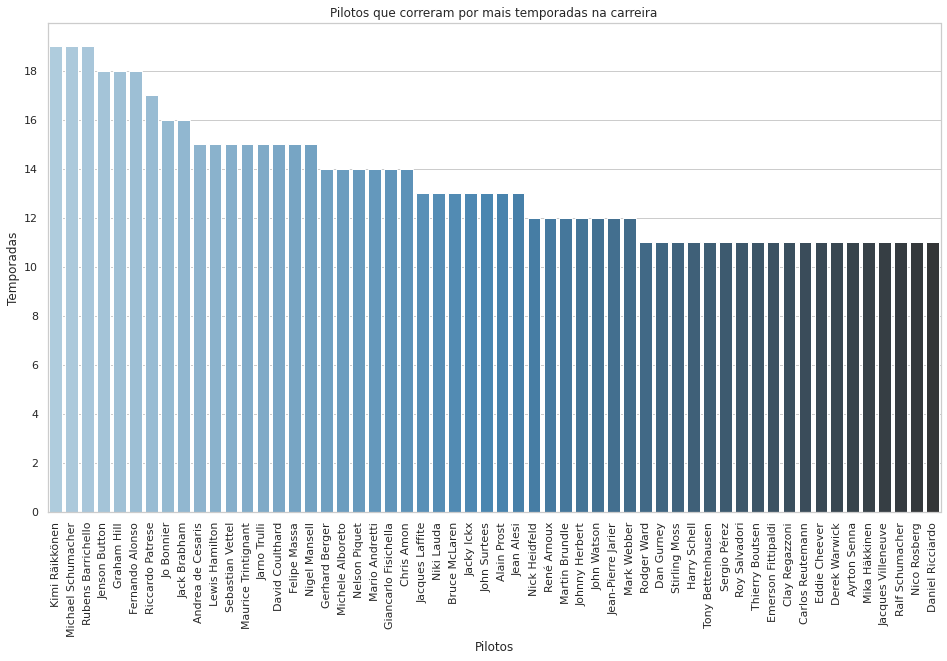

In [48]:
x = drivers_by_season_quant_95["fullname"]
y = drivers_by_season_quant_95["year"]
plt.figure(figsize = (16, 9))
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 22, 2))
chart = sns.barplot(x = x, y = y, palette="Blues_d")
chart.set(title="Pilotos que correram por mais temporadas na carreira", 
          xlabel="Pilotos", 
          ylabel="Temporadas")

plt.show()

In [65]:
drivers_df[drivers_df["forename"] == "Kimi"]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...


In [49]:
full_pit_stops = pd.merge(pit_stops_df, rrd, on = ["raceId", "driverId"], suffixes = ("_ps", "_rrd"))
# full_pit_stops

In [50]:
# full_pit_stops[full_pit_stops["raceId"] == 1008][["constructorId", "raceId", "milliseconds_ps"]].groupby("constructorId").mean()

In [51]:
# full_pit_stops[full_pit_stops["raceId"] == 1008]

/tmp/ipykernel_229/1903676261.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


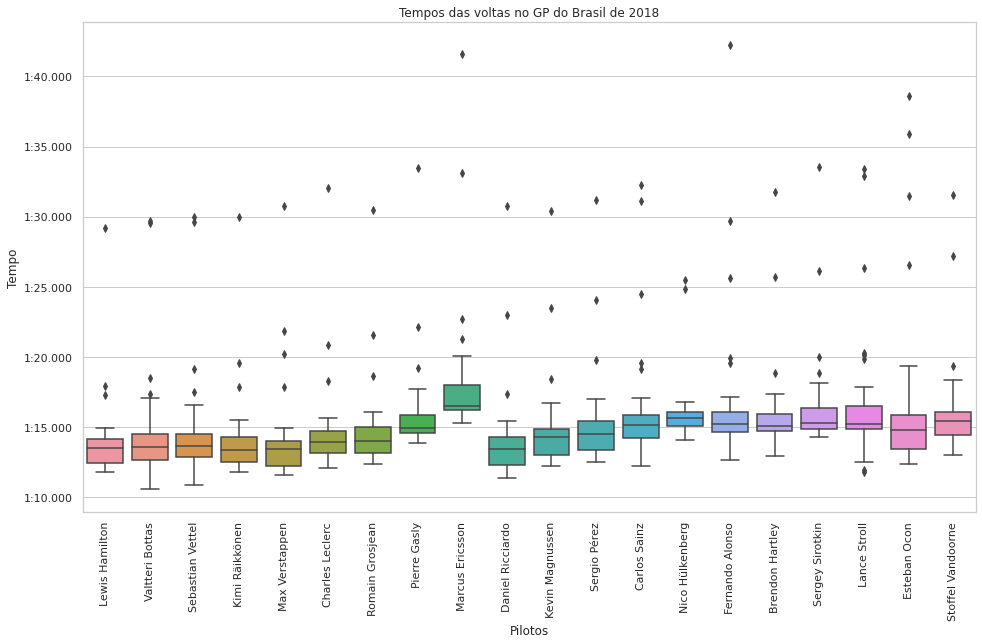

In [52]:
lap_time_data = lap_times_df[lap_times_df["raceId"] == 1008]
lap_time_data = pd.merge(lap_time_data, drivers_df, on = "driverId")

#lap_time_data = lap_time_data[lap_time_data["milliseconds"] <= 80000]

lap_time_data = lap_time_data.assign(fullname=lap_time_data.forename.map(str) + " " + lap_time_data.surname)
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90)

x = lap_time_data["fullname"]
y = lap_time_data["milliseconds"]
chart = sns.boxplot(x=x, y=y)
chart.set(title="Tempos das voltas no GP do Brasil de 2018", 
          xlabel="Pilotos", 
          ylabel="Tempo")

ax = plt.gca()
labels = [formatted_ms(int(l)) for l in ax.get_yticks().tolist()]
ax.set_yticklabels(labels)

plt.show()

# Avaliação dos tempos de paradas
A seguir os tempos médios de paradas por grande prêmio mostra o tempo médio gasto nos pit stops por circuito, nota-se o GP da Emilia Romagna como o GP com o maior tempo gasto nas paradas!

/tmp/ipykernel_229/2758139718.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


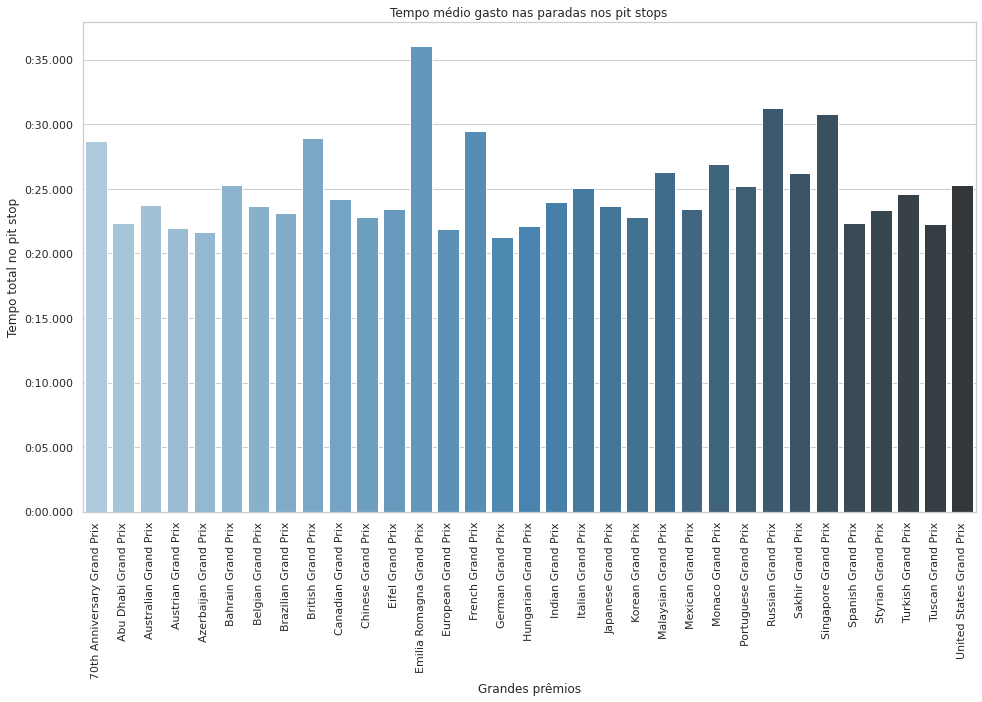

In [53]:
pit_stops = full_pit_stops[full_pit_stops["milliseconds_ps"] < 600000]
avg_by_gp = pit_stops[["milliseconds_ps", "name"]].groupby(["name"]).mean().reset_index()

x = avg_by_gp["name"]
y = avg_by_gp["milliseconds_ps"]
plt.figure(figsize = (16, 9))
plt.xticks(rotation=90)
chart = sns.barplot(x = x, y = y, palette="Blues_d")
chart.set(title="Tempo médio gasto nas paradas nos pit stops", 
          xlabel="Grandes prêmios", 
          ylabel="Tempo total no pit stop")
ax = plt.gca()
labels = [formatted_ms(int(l)) for l in ax.get_yticks().tolist()]
ax.set_yticklabels(labels)

plt.show()

# Equipes mais eficientes nas paradas
Nota-se que Mercedes, Ferrari e Red Bull são as equipes mais eficientes durante as paradas nos boxes

/tmp/ipykernel_229/391392346.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


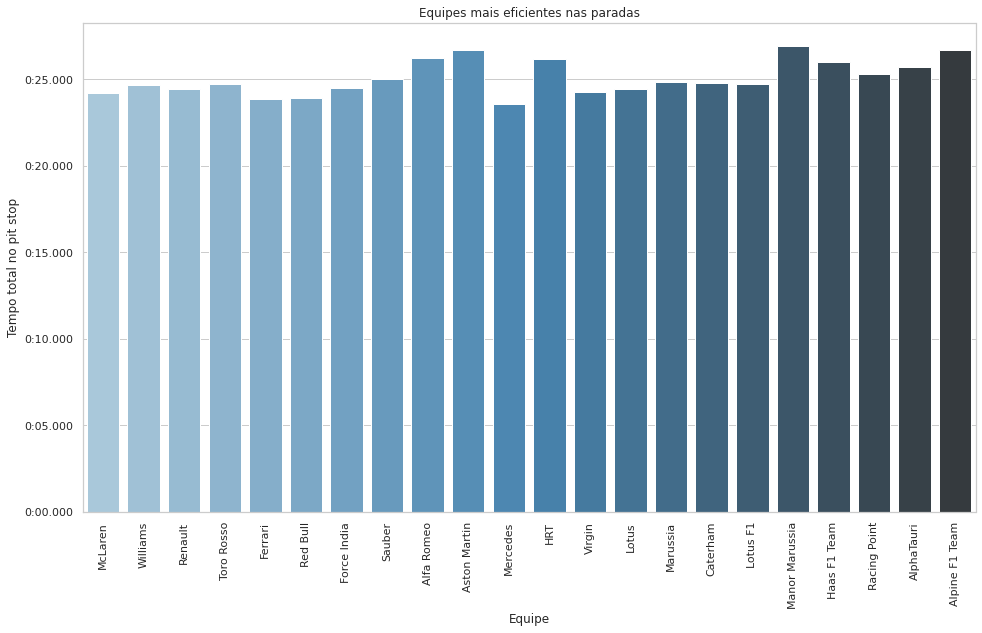

In [54]:
pit_stops = full_pit_stops[full_pit_stops["milliseconds_ps"] < 600000]
avg_by_team = pit_stops[["milliseconds_ps", "constructorId"]].groupby(["constructorId"]).mean().reset_index()
avg_by_team = pd.merge(avg_by_team, constructors_df, on = "constructorId")
x = avg_by_team["name"]
y = avg_by_team["milliseconds_ps"]
plt.figure(figsize = (16, 9))
plt.xticks(rotation=90)
chart = sns.barplot(x = x, y = y, palette="Blues_d")
chart.set(title="Equipes mais eficientes nas paradas", 
          xlabel="Equipe", 
          ylabel="Tempo total no pit stop")
ax = plt.gca()
labels = [formatted_ms(int(l)) for l in ax.get_yticks().tolist()]
ax.set_yticklabels(labels)

plt.show()

/tmp/ipykernel_229/2908930893.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


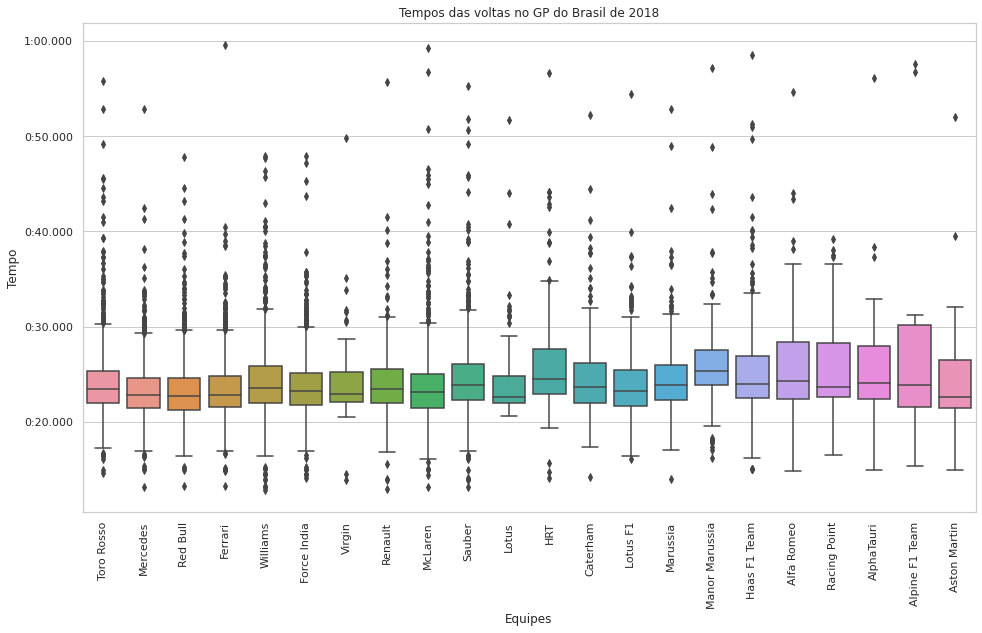

In [62]:
pit_stops = full_pit_stops[full_pit_stops["milliseconds_ps"] < 60000]
by_team = pit_stops[["milliseconds_ps", "constructorId"]]
by_team = pd.merge(by_team, constructors_df, on = "constructorId")



plt.figure(figsize = (16, 9))
plt.xticks(rotation=90)
x = by_team["name"]
y = by_team["milliseconds_ps"]
chart = sns.boxplot(x=x, y=y)
chart.set(title="Tempos das voltas no GP do Brasil de 2018", 
          xlabel="Equipes", 
          ylabel="Tempo")

ax = plt.gca()
labels = [formatted_ms(int(l)) for l in ax.get_yticks().tolist()]
ax.set_yticklabels(labels)


plt.show()